In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt   
import seaborn as sns             
df = pd.read_csv("C:/Users/hp/Desktop/Dataset/IyerLeeDataSet.csv")
df.head()


,T,Y1
0,1,9.989849
1,2,28.757469
2,3,10.214420
3,4,11.756900
4,5,12.153170


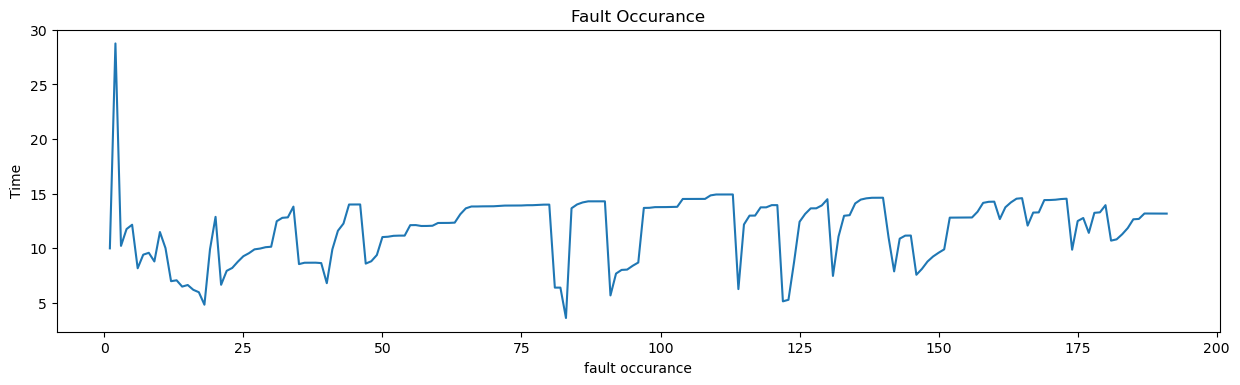

In [2]:
def plot_df(df, x, y, title="", xlabel='fault occurance', ylabel='Time', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['T'], y=df['Y1'], title='Fault Occurance')

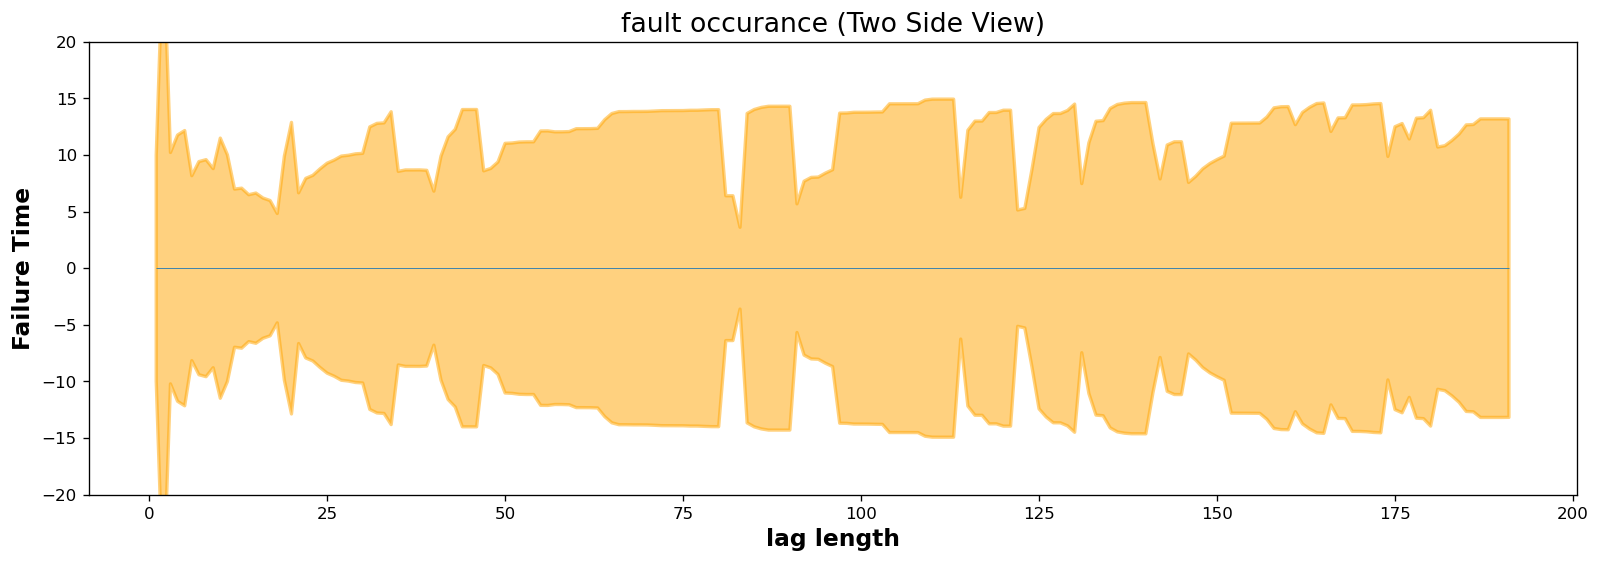

In [3]:
x = df['T'].values
y1 = df['Y1'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, linewidth=2, color='orange',alpha=0.5, interpolate=True)
#plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-20, 20)
plt.title('fault occurance (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['T']), xmax=np.max(df['T']), linewidth=.5)
plt.ylabel('Failure Time', weight='bold', fontsize=14)
plt.xlabel('lag length', weight='bold', fontsize=14)
plt.show()

In [4]:
def plot_df(df, x, y, title="", xlabel='failuer number', ylabel='Time between failuer', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    plot_df(df, x=df['T'], y=df['Y1'], title='Trend and Seasonality')
    

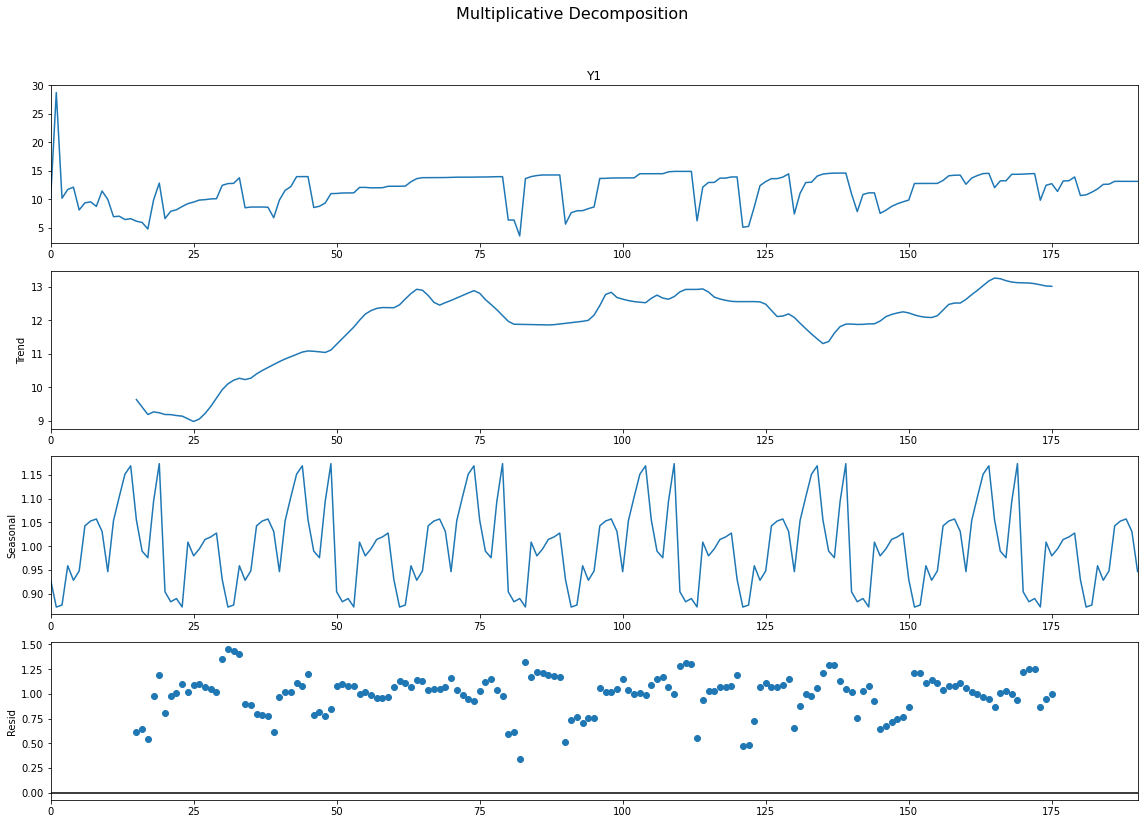

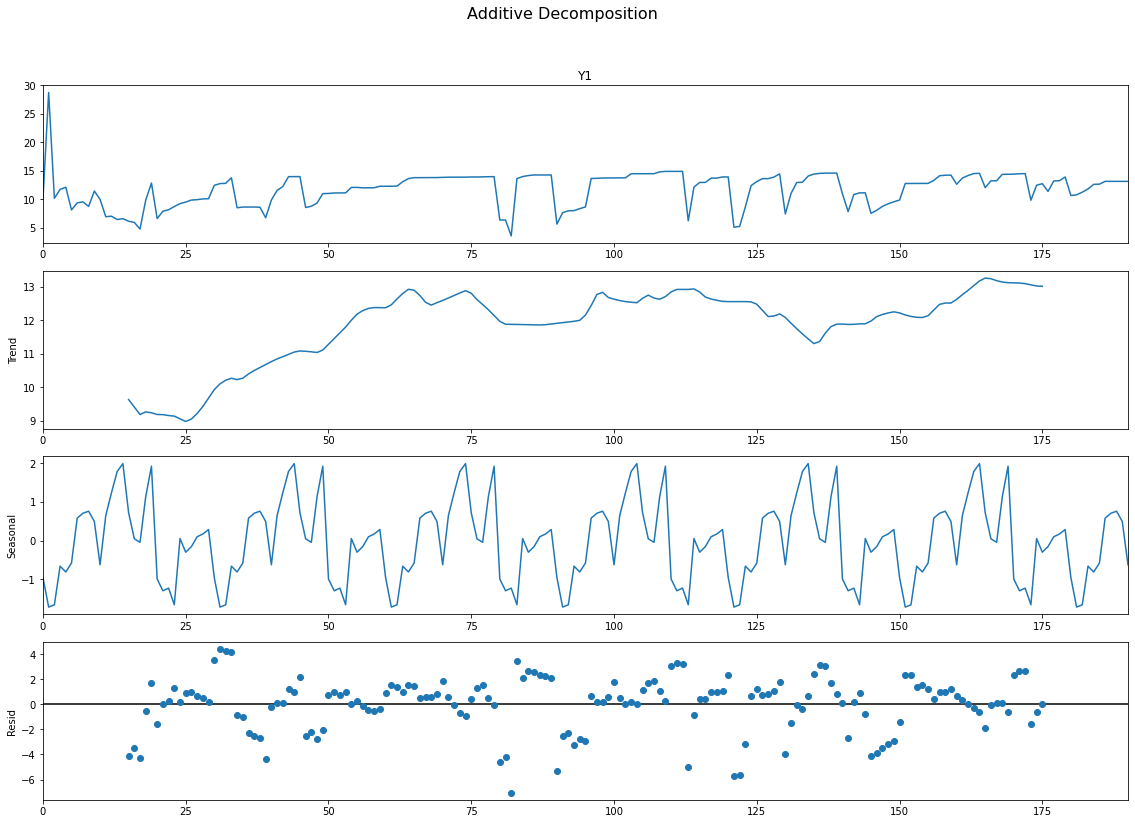

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Y1'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Y1'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Text(0.5, 0, 'lag length')

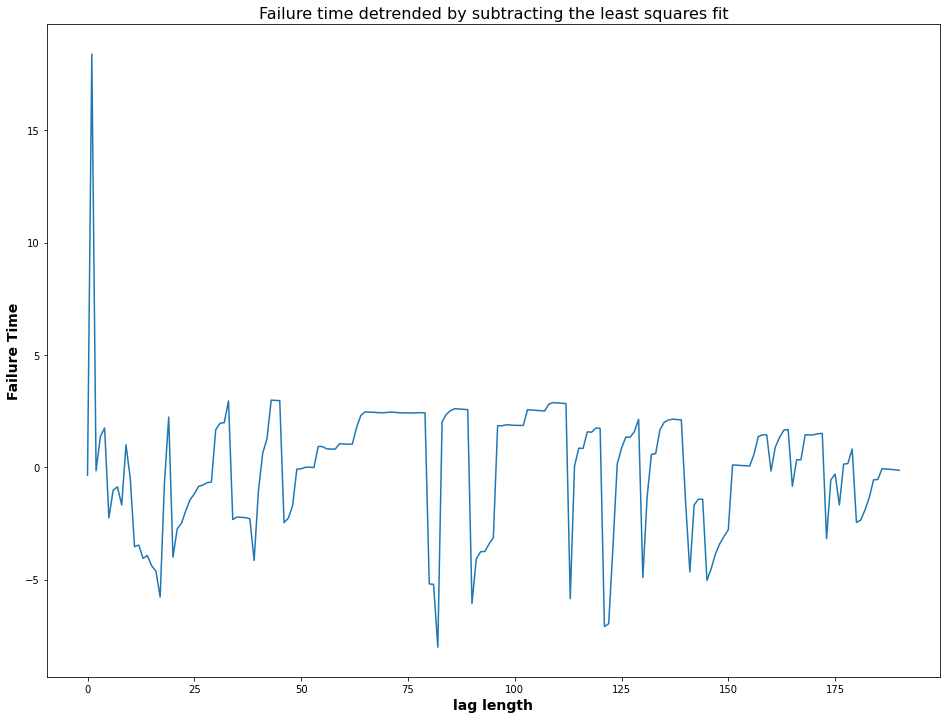

In [6]:
from scipy import signal
detrended = signal.detrend(df['Y1'].values)
plt.plot(detrended)
plt.title('Failure time detrended by subtracting the least squares fit', fontsize=16)
plt.ylabel('Failure Time', weight='bold', fontsize=14)
plt.xlabel('lag length', weight='bold', fontsize=14)


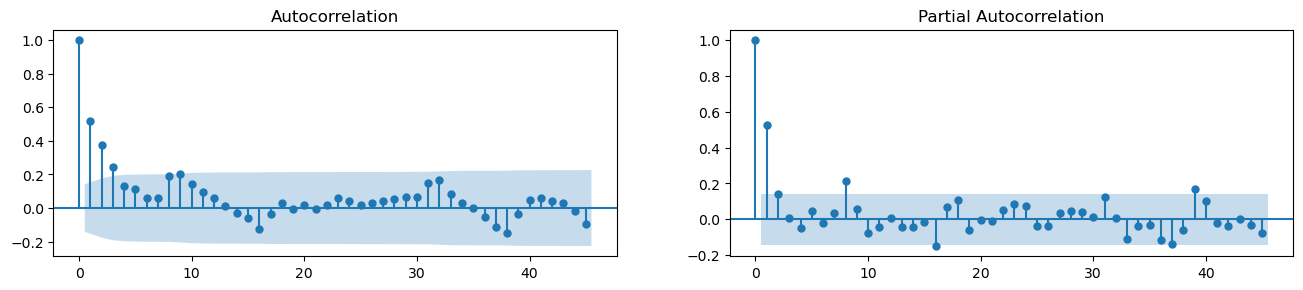

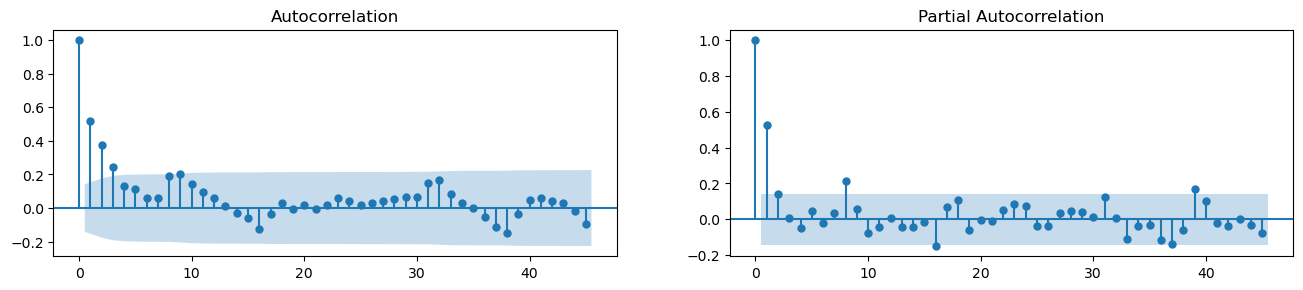

In [7]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Y1'].tolist(), lags=45, ax=axes[0])
plot_pacf(df['Y1'].tolist(), lags=45, ax=axes[1])

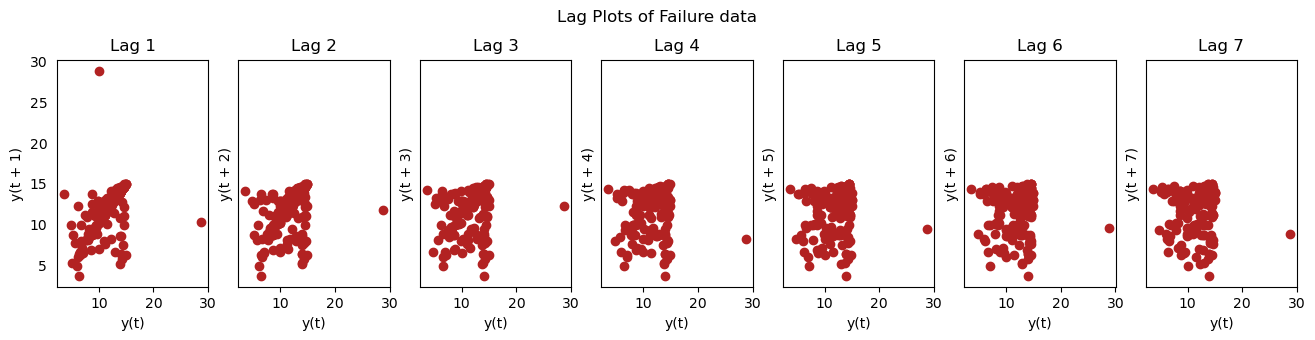

In [8]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':7})

# Plot
fig, axes = plt.subplots(1, 7, figsize=(16,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:7]):
    lag_plot(df['Y1'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Failure data', y=1.05)    
plt.show()

In [9]:
df.index = df['T']
df = df.drop(['T'], axis=1)

In [10]:
def CRA(df, attribute, list_of_prev_t_instants) :
    
        
    list_of_prev_t_instants.sort()
    start = list_of_prev_t_instants[-1] 
    end = len(df)
    df['T'] = df.index
    df.reset_index(drop=True)

    df_copy = df[start:end]
    df_copy.reset_index(inplace=True, drop=True)

    for attribute in attribute :
            foobar = pd.DataFrame()

            for prev_t in list_of_prev_t_instants :
                new_col = pd.DataFrame(df[attribute].iloc[(start - prev_t) : (end - prev_t)])
                new_col.reset_index(drop=True, inplace=True)
                new_col.rename(columns={attribute : '{}_(t-{})'.format(attribute, prev_t)}, inplace=True)
                foobar = pd.concat([foobar, new_col], sort=False, axis=1)

            df_copy = pd.concat([df_copy, foobar], sort=False, axis=1)
            
    df_copy.set_index(['T'], drop=True, inplace=True)
    return df_copy

In [11]:
list_of_attributes = ['Y1']

list_of_prev_t_instants = []
for i in range(1,31):
    list_of_prev_t_instants.append(i)

list_of_prev_t_instants

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [12]:
df_new = CRA(df, list_of_attributes, list_of_prev_t_instants)
df_new.head()

,Y1,Y1_(t-1),Y1_(t-2),Y1_(t-3),Y1_(t-4),Y1_(t-5),Y1_(t-6),Y1_(t-7),Y1_(t-8),Y1_(t-9),...,Y1_(t-21),Y1_(t-22),Y1_(t-23),Y1_(t-24),Y1_(t-25),Y1_(t-26),Y1_(t-27),Y1_(t-28),Y1_(t-29),Y1_(t-30)
T,,,,,,,,,,,,,,,,,,,,,
31,12.47476,10.13903,10.09547,9.970071,9.897319,9.544954,9.268798,8.764053,8.195885,7.929126,...,11.484650,8.789051,9.582042,9.410011,8.165648,12.153170,11.756900,10.214420,28.757469,9.989849
32,12.78531,12.47476,10.13903,10.095470,9.970071,9.897319,9.544954,9.268798,8.764053,8.195885,...,10.011270,11.484650,8.789051,9.582042,9.410011,8.165648,12.153170,11.756900,10.214420,28.757469
33,12.82833,12.78531,12.47476,10.139030,10.095470,9.970071,9.897319,9.544954,9.268798,8.764053,...,6.982863,10.011270,11.484650,8.789051,9.582042,9.410011,8.165648,12.153170,11.756900,10.214420
34,13.81181,12.82833,12.78531,12.474760,10.139030,10.095470,9.970071,9.897319,9.544954,9.268798,...,7.063904,6.982863,10.011270,11.484650,8.789051,9.582042,9.410011,8.165648,12.153170,11.756900
35,8.54714,13.81181,12.82833,12.785310,12.474760,10.139030,10.095470,9.970071,9.897319,9.544954,...,6.486161,7.063904,6.982863,10.011270,11.484650,8.789051,9.582042,9.410011,8.165648,12.153170


In [13]:
df_new.shape

(161, 31)

In [14]:
test_set_size = 0.2
valid_set_size= 0.1

df_copy = df_new.reset_index(drop=True)

df_test = df_copy.iloc[ int(np.floor(len(df_copy)*(1-test_set_size))) : ]
df_train_plus_valid = df_copy.iloc[ : int(np.floor(len(df_copy)*(1-test_set_size))) ]

df_train = df_train_plus_valid.iloc[ : int(np.floor(len(df_train_plus_valid)*(1-valid_set_size))) ]
df_valid = df_train_plus_valid.iloc[ int(np.floor(len(df_train_plus_valid)*(1-valid_set_size))) : ]


X_train, y_train = df_train.iloc[:, 1:], df_train.iloc[:, 0]
X_valid, y_valid = df_valid.iloc[:, 1:], df_valid.iloc[:, 0]
X_test, y_test = df_test.iloc[:, 1:], df_test.iloc[:, 0]

print('Shape of training inputs, training target:', X_train.shape, y_train.shape)
print('Shape of validation inputs, validation target:', X_valid.shape, y_valid.shape)
print('Shape of test inputs, test target:', X_test.shape, y_test.shape)

Shape of training inputs, training target: (115, 30) (115,)
Shape of validation inputs, validation target: (13, 30) (13,)
Shape of test inputs, test target: (33, 30) (33,)


In [15]:
from sklearn.preprocessing import MinMaxScaler

Target_scaler = MinMaxScaler(feature_range=(0.01, 0.99))
Feature_scaler = MinMaxScaler(feature_range=(0.01, 0.99))

X_train_scaled = Feature_scaler.fit_transform(np.array(X_train))
X_valid_scaled = Feature_scaler.fit_transform(np.array(X_valid))
X_test_scaled = Feature_scaler.fit_transform(np.array(X_test))

y_train_scaled = Target_scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_valid_scaled = Target_scaler.fit_transform(np.array(y_valid).reshape(-1,1))
y_test_scaled = Target_scaler.fit_transform(np.array(y_test).reshape(-1,1))

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error, median_absolute_error

model_scores = {
    'ANN':{},
    'RNN':{},
    'GRU':{},
    'LSTM':{}
}

def print_scores(y_test_rescaled, y_pred_rescaled, model_name):
  MAE = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
  MSE = mean_squared_error(y_test_rescaled, y_pred_rescaled)
  MedAE = median_absolute_error(y_test_rescaled, y_pred_rescaled)
  MaxErr = max_error(y_test_rescaled, y_pred_rescaled)

  model_scores[model_name]['Mean Abs Err'] = MAE
  model_scores[model_name]['Mean Sq Err'] = MSE
  model_scores[model_name]['Median Abs Err'] = MedAE
  model_scores[model_name]['Max Err'] = MaxErr

  print('Mean Abs Err for the test set:', round(MAE,4))
  print('Mean Sq Err for the test set:', round(MSE,4))
  print('Median Abs Err for the test set:', round(MedAE,4))
  print('Max Err for the test set:', round(MaxErr,4))

def make_prediction_plot(y_test, y_pred):
  y_actual = pd.DataFrame(y_test, columns=['Actual Failure Time'])
  y_hat = pd.DataFrame(y_pred, columns=['Predicted Failure Time'])
  plt.figure(figsize=(11, 6))
  plt.plot(y_actual)
  plt.plot(y_hat)
  plt.legend(['Actual','Predicted'], loc='best', prop={'size': 14})
  plt.ylabel('Failure Time', weight='bold', fontsize=14)
  plt.ylabel('Failure Time', weight='bold', fontsize=12)
  plt.xlabel('Lag sequence.', weight='bold', fontsize=12)
  plt.yticks(weight='bold', fontsize=12)
  #plt.grid(color = 'y', linewidth='0.5')
  plt.show()


In [17]:
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
input_layer = Input(shape=(30), dtype='float32')
dense1 = Dense(64, activation='linear')(input_layer)
dense2 = Dense(32, activation='linear')(dense1)
dropout_layer = Dropout(0.2)(dense2)
output_layer = Dense(1, activation='linear')(dropout_layer)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.utils import plot_model

In [20]:
model.fit(x=X_train_scaled, y=y_train_scaled, batch_size=5, epochs=100, verbose=1, validation_data=(X_valid_scaled, y_valid_scaled), shuffle=True)

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: 0.4648 - val_loss: 0.1350
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.2080 - val_loss: 0.1380
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0984 - val_loss: 0.1856
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0904 - val_loss: 0.1406
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0717 - val_loss: 0.1034
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0835 - val_loss: 0.0994
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0721 - val_loss: 0.1195
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0792 - val_loss: 0.1710
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0652 - val_loss: 0.1296
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0688 - val_loss: 0.0797
Epoch 11

In [21]:
y_pred = model.predict(X_test_scaled)
y_pred_rescaled = Target_scaler.inverse_transform(y_pred)
y_test_rescaled =  Target_scaler.inverse_transform(y_test_scaled)
print_scores(y_test_rescaled, y_pred_rescaled, 'ANN')

2/2 [==============================] - 0s 2ms/step
Mean Abs Err for the test set: 0.9229
Mean Sq Err for the test set: 1.7936
Median Abs Err for the test set: 0.6994
Max Err for the test set: 4.0548


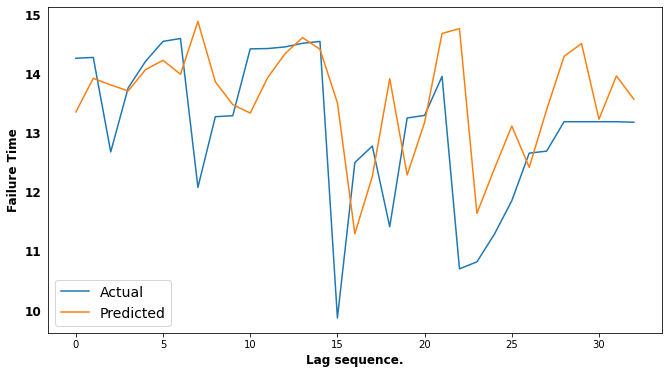

In [22]:
make_prediction_plot(y_test_rescaled, y_pred_rescaled)


In [23]:
def Reshape(x, model_name):
  if model_name=="LSTM":
    return x.reshape((x.shape[0], 1, x.shape[1]))
  return x

In [24]:
model_name = "LSTM"
X_train_scaled = Reshape(X_train_scaled, model_name)
X_valid_scaled = Reshape(X_valid_scaled, model_name)
X_test_scaled = Reshape(X_test_scaled, model_name)

In [25]:
model = Sequential()
model.add(LSTM(64, input_shape=(1,30)))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                24320     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 26,433
Trainable params: 26,433
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow.keras.utils import plot_model

In [27]:
model.fit(x=X_train_scaled, y=y_train_scaled, batch_size=5, epochs=100, verbose=1, validation_data=(X_valid_scaled, y_valid_scaled), shuffle=True)

Epoch 1/100
23/23 [==============================] - 2s 23ms/step - loss: 0.2211 - val_loss: 0.1077
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0945 - val_loss: 0.1210
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0772 - val_loss: 0.1057
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0671 - val_loss: 0.1136
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0570 - val_loss: 0.1409
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0682 - val_loss: 0.1109
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0537 - val_loss: 0.1487
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0596 - val_loss: 0.1148
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0426 - val_loss: 0.0956
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0517 - val_loss: 0.1382
Epoch 11

2/2 [==============================] - 0s 6ms/step
Mean Abs Err for the test set: 0.9235
Mean Sq Err for the test set: 1.5896
Median Abs Err for the test set: 0.7494
Max Err for the test set: 3.6328


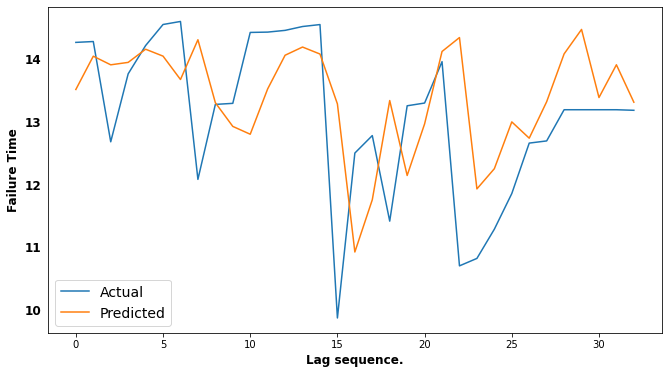

In [28]:
y_pred = model.predict(X_test_scaled)
y_pred_rescaled = Target_scaler.inverse_transform(y_pred)
y_test_rescaled =  Target_scaler.inverse_transform(y_test_scaled)
print_scores(y_test_rescaled, y_pred_rescaled, 'LSTM')
make_prediction_plot(y_test_rescaled, y_pred_rescaled)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                18432     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20,545
Trainable params: 20,545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
23/23 [==============================]

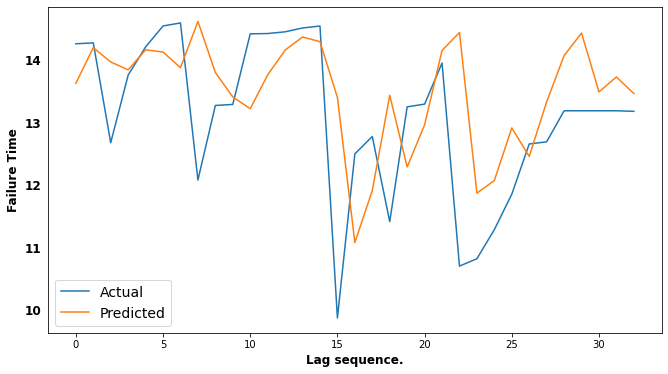

In [29]:
model = Sequential()
model.add(GRU(64, input_shape=(1,30)))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
from tensorflow.keras.utils import plot_model
model.fit(x=X_train_scaled, y=y_train_scaled, batch_size=5, epochs=100, verbose=1, validation_data=(X_valid_scaled, y_valid_scaled), shuffle=True)
y_pred = model.predict(X_test_scaled)
y_pred_rescaled = Target_scaler.inverse_transform(y_pred)
y_test_rescaled =  Target_scaler.inverse_transform(y_test_scaled)
print_scores(y_test_rescaled, y_pred_rescaled, 'GRU')
make_prediction_plot(y_test_rescaled, y_pred_rescaled)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                6080      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,193
Trainable params: 8,193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
23/23 [==============================] -

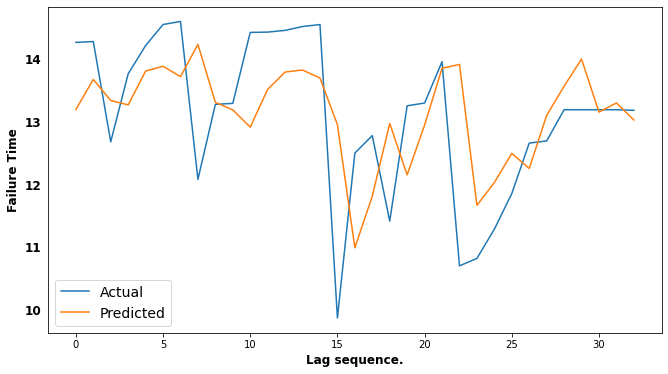

In [30]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(1,30)))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
from tensorflow.keras.utils import plot_model
model.fit(x=X_train_scaled, y=y_train_scaled, batch_size=5, epochs=100, verbose=1, validation_data=(X_valid_scaled, y_valid_scaled), shuffle=True)
y_pred = model.predict(X_test_scaled)
y_pred_rescaled = Target_scaler.inverse_transform(y_pred)
y_test_rescaled =  Target_scaler.inverse_transform(y_test_scaled)
print_scores(y_test_rescaled, y_pred_rescaled, 'RNN')
make_prediction_plot(y_test_rescaled, y_pred_rescaled)


In [31]:
from matplotlib.pyplot import figure

def print_comparison_graph(algos_name, error_names, error_val):
  figure(figsize=(20, 10), dpi=240)
  plt.rcParams.update({'font.size': 14})
  X = algos_name
  E = error_names
  E0 = error_val[:,0]
  E1 = error_val[:,1]
  E2 = error_val[:,2]
  E3 = error_val[:,3]
    
  X_axis = np.arange(len(X))
    
  plt.bar(X_axis - 0.3, E0, 0.2, label = E[0])
  plt.bar(X_axis - 0.1, E1, 0.2, label = E[1])
  plt.bar(X_axis + 0.1, E2, 0.2, label = E[2])
  plt.bar(X_axis + 0.3, E3, 0.2, label = E[3])
    
  plt.xticks(X_axis, X)
  plt.xlabel("ML/DL Algos")
  plt.ylabel("Error value")
  plt.title("Prediction Errors")
  plt.legend()
  plt.show()

In [32]:
algos_name = list(model_scores.keys())
error_names = list(model_scores['ANN'].keys())

error_val = []
for algo in algos_name:
  error_val.append(list(model_scores[algo].values()))

error_val = np.array(error_val,dtype=object)
print(error_val)

[[0.9228966161166104 1.7935954949429167 0.6994414028930667
  4.054820781555176]
 [0.8502637647575609 1.286398313503421 0.6644505642700196
  3.20510936340332]
 [0.8797793918013139 1.5732541955498842 0.6399683651733401
  3.736307864990234]
 [0.9235188281878848 1.5896352824044033 0.7493651654052726
  3.63278270324707]]


In [33]:
scores_df = pd.DataFrame(model_scores.values())
scores_df.index = model_scores.keys()
scores_df

,Mean Abs Err,Mean Sq Err,Median Abs Err,Max Err
ANN,0.922897,1.793595,0.699441,4.054821
RNN,0.850264,1.286398,0.664451,3.205109
GRU,0.879779,1.573254,0.639968,3.736308
LSTM,0.923519,1.589635,0.749365,3.632783


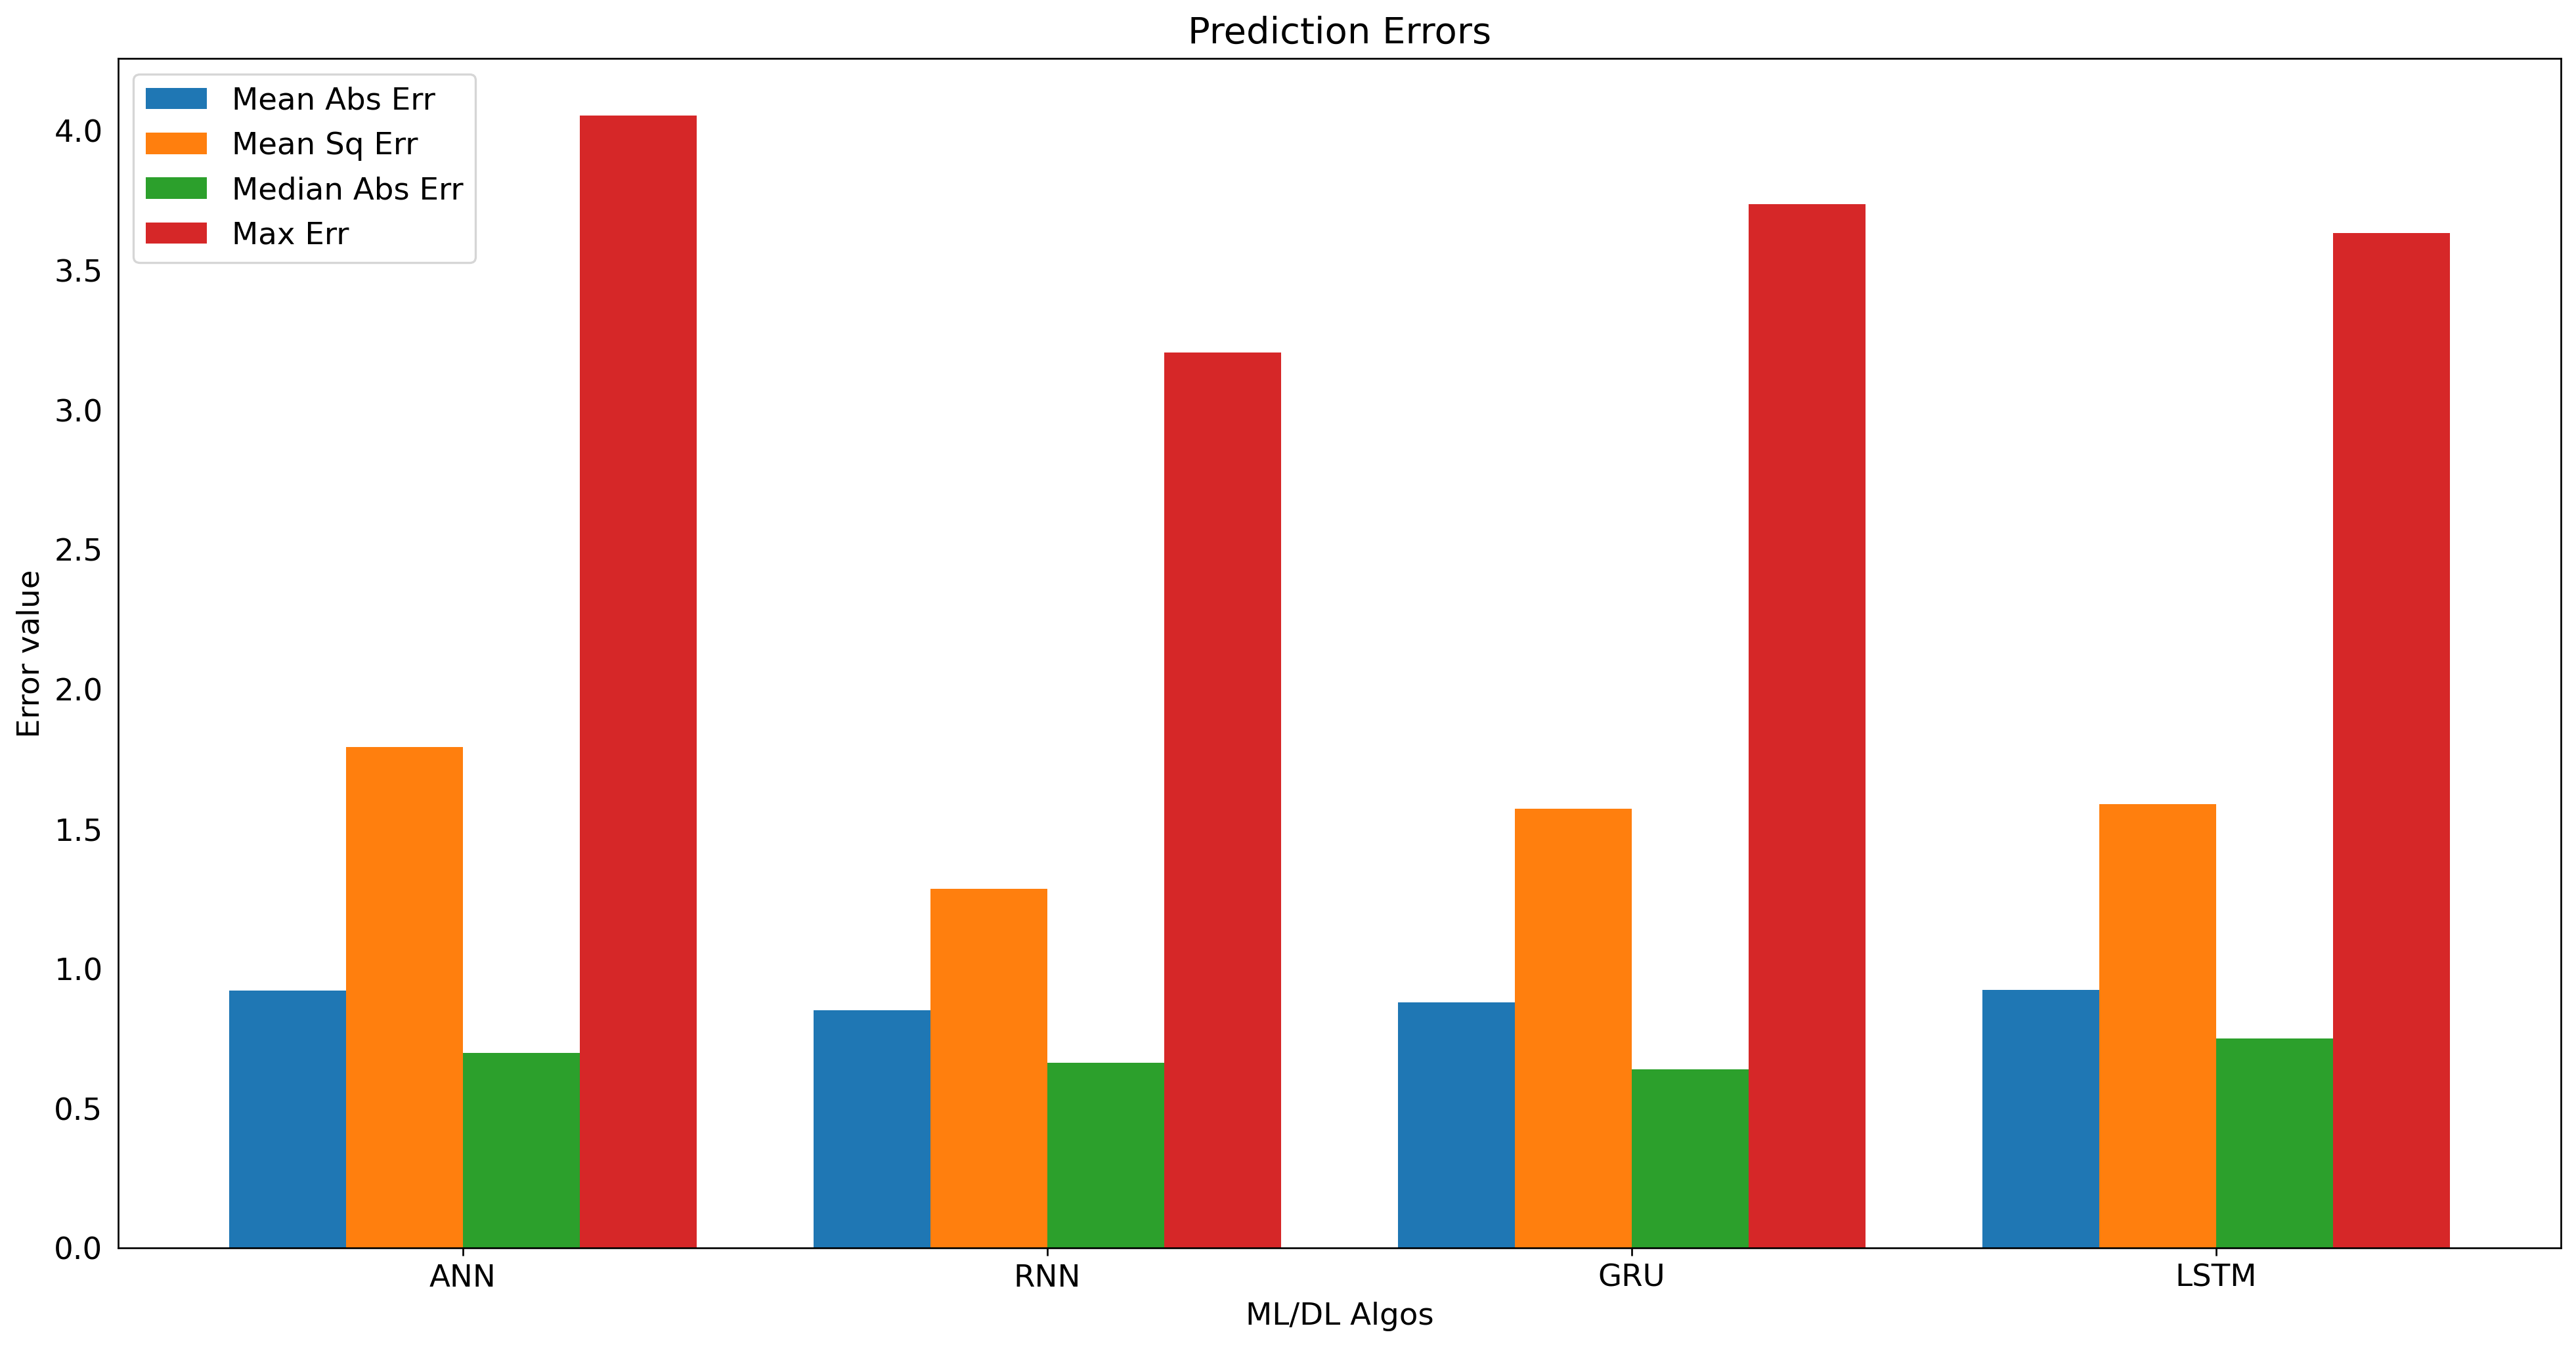

In [34]:
print_comparison_graph(algos_name, error_names, error_val)


In [35]:
scores_df = pd.DataFrame(model_scores.values())
scores_df.index = model_scores.keys()
scores_df

,Mean Abs Err,Mean Sq Err,Median Abs Err,Max Err
ANN,0.922897,1.793595,0.699441,4.054821
RNN,0.850264,1.286398,0.664451,3.205109
GRU,0.879779,1.573254,0.639968,3.736308
LSTM,0.923519,1.589635,0.749365,3.632783


In [36]:
import numpy as np
rmse = np.sqrt(scores_df['Mean Sq Err'])

In [37]:
rmse

ANN     1.339252
RNN     1.134195
GRU     1.254294
LSTM    1.260807
Name: Mean Sq Err, dtype: float64

In [38]:
Target_scaler = MinMaxScaler(feature_range=(0.01, 0.99))
Feature_scaler = MinMaxScaler(feature_range=(0.01, 0.99))

X_train_scaled = Feature_scaler.fit_transform(np.array(X_train))
X_valid_scaled = Feature_scaler.fit_transform(np.array(X_valid))
X_test_scaled = Feature_scaler.fit_transform(np.array(X_test))

y_train_scaled = Target_scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_valid_scaled = Target_scaler.fit_transform(np.array(y_valid).reshape(-1,1))
y_test_scaled = Target_scaler.fit_transform(np.array(y_test).reshape(-1,1))

In [39]:
X_train_scaled.shape


(115, 30)

In [40]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()


In [41]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [42]:
model.fit(X_train_scaled, y_train_scaled)
lin_model.fit(X_train_scaled, y_train_scaled)

C:\Users\hp\AppData\Local\Temp/ipykernel_6408/976862120.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

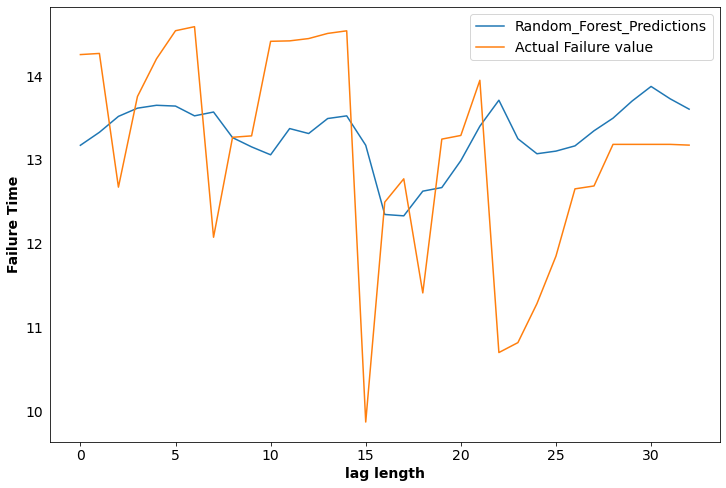

In [43]:
pred=model.predict(X_test_scaled)
import matplotlib.pyplot as plt
y_pred_rescaled = Target_scaler.inverse_transform(pred.reshape(-1, 1))
y_test_rescaled = Target_scaler.inverse_transform(y_test_scaled)
plt.rcParams["figure.figsize"] = (12, 8)
plt.ylabel('Failure Time', weight='bold', fontsize=14)
plt.xlabel('lag length', weight='bold', fontsize=14)
plt.plot(y_pred_rescaled, label='Random_Forest_Predictions')
plt.plot(y_test_rescaled, label='Actual Failure value')
plt.legend(loc="upper right")
plt.show()


In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error, median_absolute_error, r2_score
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test_rescaled,y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
msle = mean_squared_log_error(y_test_rescaled, y_pred_rescaled)
medae = median_absolute_error(y_test_rescaled, y_pred_rescaled)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("Median Absolute Error (MedAE):", medae)

Mean Squared Error (MSE): 1.4747040194929475
Root Mean Squared Error (RMSE): 1.2143739207892055
Mean Absolute Error (MAE): 0.9516258841767381
Mean Absolute Percentage Error (MAPE): 0.07748255146521012
Mean Squared Logarithmic Error (MSLE): 0.008233787939967412
Median Absolute Error (MedAE): 0.8443901144708246


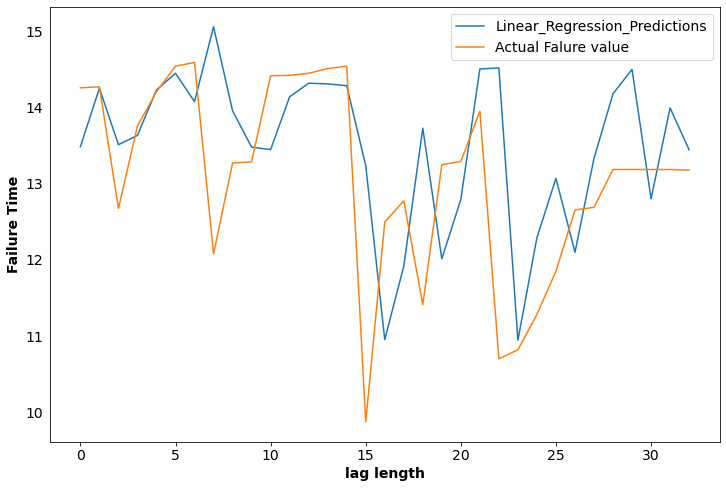

In [45]:
lin_pred=lin_model.predict(X_test_scaled)
import matplotlib.pyplot as plt
y_pred_rescaled = Target_scaler.inverse_transform(lin_pred.reshape(-1, 1))
y_test_rescaled = Target_scaler.inverse_transform(y_test_scaled)

plt.rcParams["figure.figsize"] = (12, 8)
plt.ylabel('Failure Time', weight='bold', fontsize=14)
plt.xlabel('lag length', weight='bold', fontsize=14)
plt.plot(y_pred_rescaled, label='Linear_Regression_Predictions')
plt.plot(y_test_rescaled, label='Actual Falure value')
plt.legend(loc="upper right")
plt.show()


In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test_rescaled,y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
msle = mean_squared_log_error(y_test_rescaled, y_pred_rescaled)
medae = median_absolute_error(y_test_rescaled, y_pred_rescaled)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("Median Absolute Error (MedAE):", medae)

Mean Squared Error (MSE): 1.6782813994180028
Root Mean Squared Error (RMSE): 1.2954850054778724
Mean Absolute Error (MAE): 0.8962165893459677
Mean Absolute Percentage Error (MAPE): 0.074538127094118
Mean Squared Logarithmic Error (MSLE): 0.009197601915771422
Median Absolute Error (MedAE): 0.6418457278850305


C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:865: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error (MSE): 1.4488984067623172
Root Mean Squared Error (RMSE): 1.203701959274935
Mean Absolute Error (MAE): 0.8646673405325134
Mean Absolute Percentage Error (MAPE): 0.06985727866041476
Mean Squared Logarithmic Error (MSLE): 0.007766409344264428
Median Absolute Error (MedAE): 0.5831794313932388


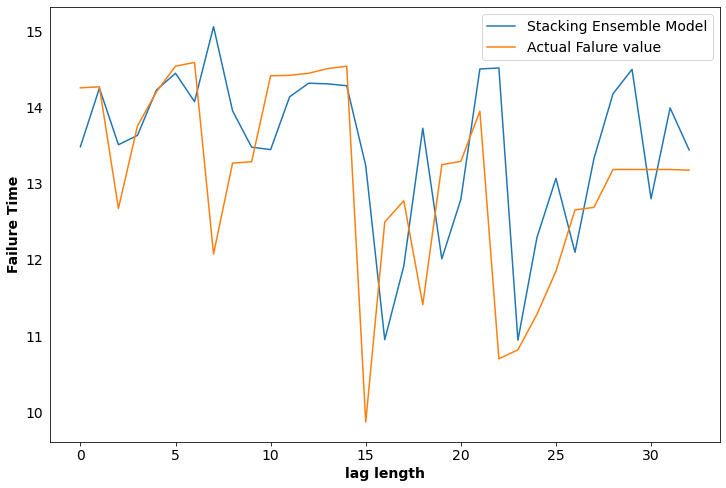

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
base_estimators = [
    ('ridge', RidgeCV()),
    ('dt', DecisionTreeRegressor(random_state=42))
]

stacked_model = StackingRegressor(
    estimators=base_estimators,
    final_estimator=GradientBoostingRegressor(n_estimators=100, random_state=42)
)

stacked_model.fit(X_train_scaled, y_train_scaled)
y_pred = stacked_model.predict(X_test_scaled)
y_pred_rescaled = Target_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = Target_scaler.inverse_transform(y_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test_rescaled,y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
msle = mean_squared_log_error(y_test_rescaled, y_pred_rescaled)
medae = median_absolute_error(y_test_rescaled, y_pred_rescaled)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("Median Absolute Error (MedAE):", medae)

# Plotting the predictions
y_pred_rescaled = Target_scaler.inverse_transform(lin_pred.reshape(-1, 1))
y_test_rescaled = Target_scaler.inverse_transform(y_test_scaled)
plt.rcParams["figure.figsize"] = (12, 8)
plt.ylabel('Failure Time', weight='bold', fontsize=14)
plt.xlabel('lag length', weight='bold', fontsize=14)
plt.plot(y_pred_rescaled, label='Stacking Ensemble Model')
plt.plot(y_test_rescaled, label='Actual Falure value')
plt.legend(loc="upper right")
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error (MSE): 1.4788343356775016
Root Mean Squared Error (RMSE): 1.2160733266039108
Mean Absolute Error (MAE): 0.8898736309952431
Mean Absolute Percentage Error (MAPE): 0.07316724692590311
Mean Squared Logarithmic Error (MSLE): 0.008228551795658094
Median Absolute Error (MedAE): 0.6295010100355221


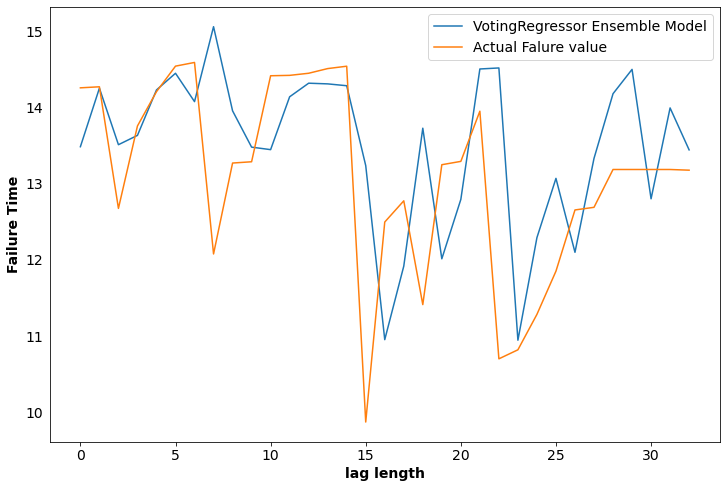

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize individual models
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
linear_regression_model = LinearRegression()

# Create an ensemble model using VotingRegressor
ensemble_model = VotingRegressor(
    estimators=[
        ('random_forest', random_forest_model),
        ('gradient_boosting', gradient_boosting_model),
        ('linear_regression', linear_regression_model)
    ]
)

# Training the ensemble model
ensemble_model.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred = ensemble_model.predict(X_test_scaled)
y_pred_rescaled = Target_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = Target_scaler.inverse_transform(y_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test_rescaled,y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
msle = mean_squared_log_error(y_test_rescaled, y_pred_rescaled)
medae = median_absolute_error(y_test_rescaled, y_pred_rescaled)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("Median Absolute Error (MedAE):", medae)
# Plotting the predictions
y_pred_rescaled = Target_scaler.inverse_transform(lin_pred.reshape(-1, 1))
y_test_rescaled = Target_scaler.inverse_transform(y_test_scaled)
plt.rcParams["figure.figsize"] = (12, 8)
plt.ylabel('Failure Time', weight='bold', fontsize=14)
plt.xlabel('lag length', weight='bold', fontsize=14)
plt.plot(y_pred_rescaled, label='VotingRegressor Ensemble Model')
plt.plot(y_test_rescaled, label='Actual Falure value')
plt.legend(loc="upper right")
plt.show()

C:\Users\hp\AppData\Local\Temp/ipykernel_6408/2711366216.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train_scaled, y_train_scaled)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error (MSE): 1.5250231446781954
Root Mean Squared Error (RMSE): 1.2349182744935778
Mean Absolute Error (MAE): 0.9397083666190738
Mean Absolute Percentage Error (MAPE): 0.07653469577995266
Mean Squared Logarithmic Error (MSLE): 0.008462301648156978
Median Absolute Error (MedAE): 0.7683923894024502


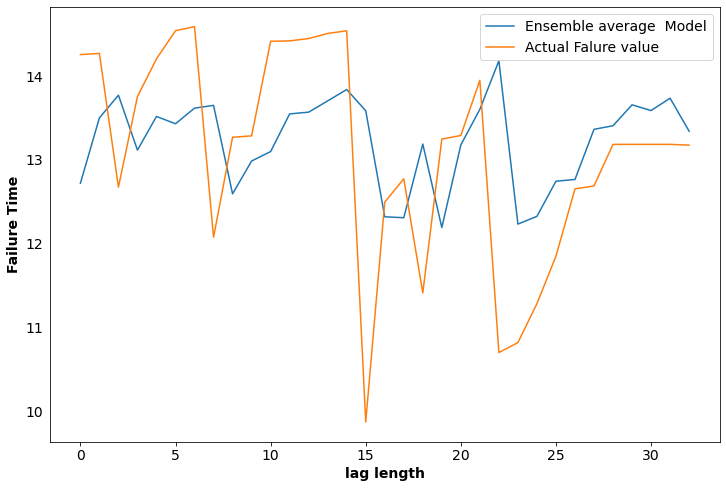

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error, median_absolute_error, r2_score
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf')

# Training the individual models
random_forest_model.fit(X_train_scaled, y_train_scaled)
gradient_boosting_model.fit(X_train_scaled, y_train_scaled)
svr_model.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_rf = random_forest_model.predict(X_test_scaled)
y_pred_rescaled_rf = Target_scaler.inverse_transform(y_pred_rf.reshape(-1, 1))
y_pred_gb = gradient_boosting_model.predict(X_test_scaled)
y_pred_rescaled_gb = Target_scaler.inverse_transform(y_pred_gb.reshape(-1, 1))
y_pred_svr = svr_model.predict(X_test_scaled)
y_pred_rescaled_svr = Target_scaler.inverse_transform(y_pred_svr.reshape(-1, 1))
y_pred_ensemble = (y_pred_rescaled_rf + y_pred_rescaled_gb + y_pred_rescaled_svr) / 3.0
y_test_rescaled = Target_scaler.inverse_transform(y_test_scaled)
mse = mean_squared_error(y_test_rescaled, y_pred_ensemble)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, y_pred_ensemble)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_ensemble)
msle = mean_squared_log_error(y_test_rescaled, y_pred_ensemble)
medae = median_absolute_error(y_test_rescaled, y_pred_ensemble)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("Median Absolute Error (MedAE):", medae)
plt.rcParams["figure.figsize"] = (12, 8)
plt.ylabel('Failure Time', weight='bold', fontsize=14)
plt.xlabel('lag length', weight='bold', fontsize=14)
plt.plot(y_pred_ensemble, label='Ensemble average  Model')
plt.plot(y_test_rescaled, label='Actual Falure value')
plt.legend(loc="upper right")
plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mean Squared Error (MSE): 1.4496077487725367
Root Mean Squared Error (RMSE): 1.203996573405646
Mean Absolute Error (MAE): 0.892956169035349
Mean Absolute Percentage Error (MAPE): 0.07301473605989889
Mean Squared Logarithmic Error (MSLE): 0.008123438001184285
Median Absolute Error (MedAE): 0.8991086993953932


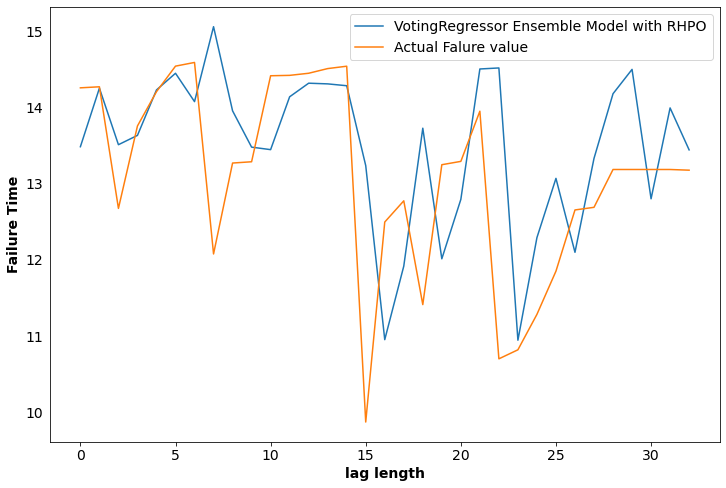

In [50]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Initialize base estimators
random_forest_base = RandomForestRegressor()
gradient_boosting_base = GradientBoostingRegressor()

# Define hyperparameter grid for Random Forest
random_forest_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Corrected values for max_features
}

# Define hyperparameter grid for Gradient Boosting
gradient_boosting_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
y_train1 = y_train_scaled.ravel()
# RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(random_forest_base, random_forest_param_grid, n_iter=10, cv=3, random_state=42, verbose=2, n_jobs=-1)
rf_random_search.fit(X_train_scaled, y_train1)

# RandomizedSearchCV for Gradient Boosting
gb_random_search = RandomizedSearchCV(gradient_boosting_base, gradient_boosting_param_grid, n_iter=10, cv=3, random_state=42, verbose=2, n_jobs=-1)
gb_random_search.fit(X_train_scaled, y_train1)

# Get the best estimators from RandomizedSearchCV
best_rf_estimator = rf_random_search.best_estimator_
best_gb_estimator = gb_random_search.best_estimator_

# Ensemble model
ensemble_model = [('random_forest', best_rf_estimator), ('gradient_boosting', best_gb_estimator)]

# Training the ensemble model
ensemble = VotingRegressor(estimators=ensemble_model)
ensemble.fit(X_train_scaled, y_train1)

# Predictions
y_pred = ensemble.predict(X_test_scaled)
y_pred_rescaled = Target_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = Target_scaler.inverse_transform(y_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test_rescaled,y_pred_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
msle = mean_squared_log_error(y_test_rescaled, y_pred_rescaled)
medae = median_absolute_error(y_test_rescaled, y_pred_rescaled)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("Median Absolute Error (MedAE):", medae)
# Plotting the predictions
y_pred_rescaled = Target_scaler.inverse_transform(lin_pred.reshape(-1, 1))
y_test_rescaled = Target_scaler.inverse_transform(y_test_scaled)
plt.rcParams["figure.figsize"] = (12, 8)
plt.ylabel('Failure Time', weight='bold', fontsize=14)
plt.xlabel('lag length', weight='bold', fontsize=14)
plt.plot(y_pred_rescaled, label='VotingRegressor Ensemble Model with RHPO')
plt.plot(y_test_rescaled, label='Actual Falure value')
plt.legend(loc="upper right")
plt.show()
